In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime import lime_tabular

Carichiamo i dati 

In [3]:
data = load_breast_cancer()
X, y = data['data'], data['target']

print(X)
print(y)


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

Print per vedere se maligno o benigno

In [4]:

print(data['target_names'])

['malignant' 'benign']


Usiamo un tree classifier come primo approccio ma cosi non avremmo bisogno di lime in realta

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
print(tree_clf.score(X_test, y_test))

0.956140350877193


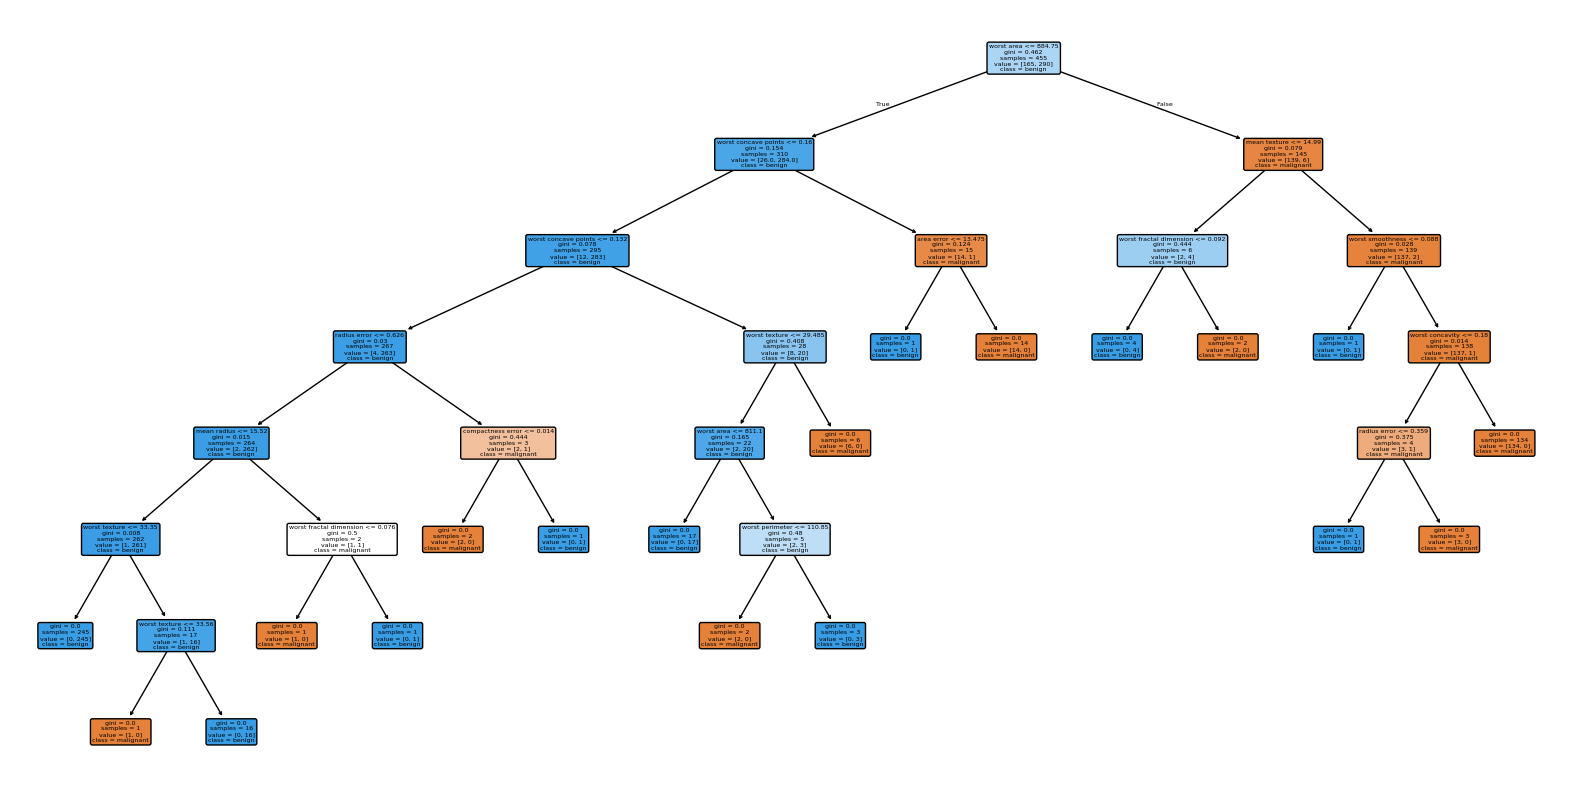

In [6]:
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=data['feature_names'], class_names=data['target_names'],rounded=True)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
print('accuracy forest classifier:', forest_clf.score(X_test, y_test))

accuracy forest classifier: 0.9385964912280702


Qua vediamo l'importanza che viene data alle varie feature ma non sappiamo perchè

In [8]:
print(dict(zip(data['feature_names'], forest_clf.feature_importances_)))

{np.str_('mean radius'): np.float64(0.045818747577246424), np.str_('mean texture'): np.float64(0.011492127480494628), np.str_('mean perimeter'): np.float64(0.05815541215480192), np.str_('mean area'): np.float64(0.07185077482791169), np.str_('mean smoothness'): np.float64(0.007795761896032645), np.str_('mean compactness'): np.float64(0.005501363126430506), np.str_('mean concavity'): np.float64(0.04827438527837609), np.str_('mean concave points'): np.float64(0.13144660049937326), np.str_('mean symmetry'): np.float64(0.0030185072640458795), np.str_('mean fractal dimension'): np.float64(0.003716850942248731), np.str_('radius error'): np.float64(0.019086203807811796), np.str_('texture error'): np.float64(0.0046080901108726015), np.str_('perimeter error'): np.float64(0.017147364453043074), np.str_('area error'): np.float64(0.020614029717882048), np.str_('smoothness error'): np.float64(0.003919808659736904), np.str_('compactness error'): np.float64(0.0033721058044390807), np.str_('concavity e

Ora usiamo lime per spiegare queste scelte che vengono fatte

Correct:  Malignant
Classification:  [1]
{np.str_('mean radius'): np.float64(13.17), np.str_('mean texture'): np.float64(21.81), np.str_('mean perimeter'): np.float64(85.42), np.str_('mean area'): np.float64(531.5), np.str_('mean smoothness'): np.float64(0.09714), np.str_('mean compactness'): np.float64(0.1047), np.str_('mean concavity'): np.float64(0.08259), np.str_('mean concave points'): np.float64(0.05252), np.str_('mean symmetry'): np.float64(0.1746), np.str_('mean fractal dimension'): np.float64(0.06177), np.str_('radius error'): np.float64(0.1938), np.str_('texture error'): np.float64(0.6123), np.str_('perimeter error'): np.float64(1.334), np.str_('area error'): np.float64(14.49), np.str_('smoothness error'): np.float64(0.00335), np.str_('compactness error'): np.float64(0.01384), np.str_('concavity error'): np.float64(0.01452), np.str_('concave points error'): np.float64(0.006853), np.str_('symmetry error'): np.float64(0.01113), np.str_('fractal dimension error'): np.float64(0.0

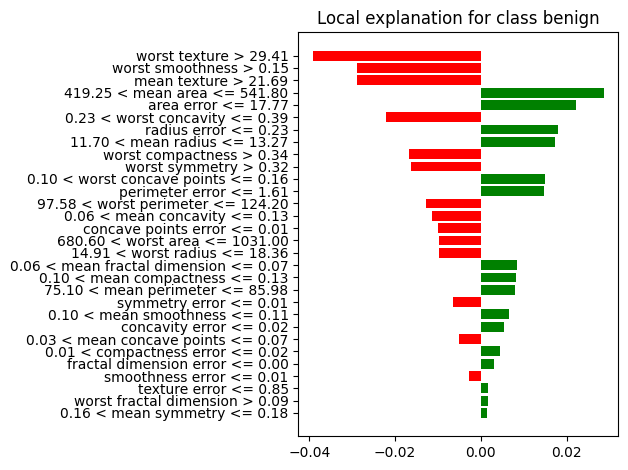

Correct:  Malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(16.11), np.str_('mean texture'): np.float64(18.05), np.str_('mean perimeter'): np.float64(105.1), np.str_('mean area'): np.float64(813.0), np.str_('mean smoothness'): np.float64(0.09721), np.str_('mean compactness'): np.float64(0.1137), np.str_('mean concavity'): np.float64(0.09447), np.str_('mean concave points'): np.float64(0.05943), np.str_('mean symmetry'): np.float64(0.1861), np.str_('mean fractal dimension'): np.float64(0.06248), np.str_('radius error'): np.float64(0.7049), np.str_('texture error'): np.float64(1.332), np.str_('perimeter error'): np.float64(4.533), np.str_('area error'): np.float64(74.08), np.str_('smoothness error'): np.float64(0.00677), np.str_('compactness error'): np.float64(0.01938), np.str_('concavity error'): np.float64(0.03067), np.str_('concave points error'): np.float64(0.01167), np.str_('symmetry error'): np.float64(0.01875), np.str_('fractal dimension error'): np.float64(0.003

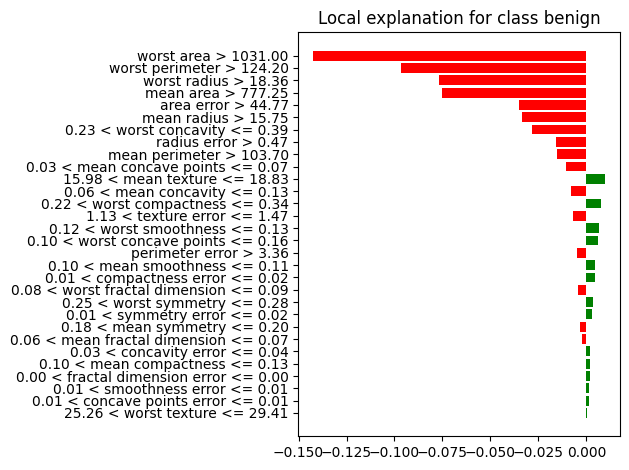

Correct:  Malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(19.02), np.str_('mean texture'): np.float64(24.59), np.str_('mean perimeter'): np.float64(122.0), np.str_('mean area'): np.float64(1076.0), np.str_('mean smoothness'): np.float64(0.09029), np.str_('mean compactness'): np.float64(0.1206), np.str_('mean concavity'): np.float64(0.1468), np.str_('mean concave points'): np.float64(0.08271), np.str_('mean symmetry'): np.float64(0.1953), np.str_('mean fractal dimension'): np.float64(0.05629), np.str_('radius error'): np.float64(0.5495), np.str_('texture error'): np.float64(0.6636), np.str_('perimeter error'): np.float64(3.055), np.str_('area error'): np.float64(57.65), np.str_('smoothness error'): np.float64(0.003872), np.str_('compactness error'): np.float64(0.01842), np.str_('concavity error'): np.float64(0.0371), np.str_('concave points error'): np.float64(0.012), np.str_('symmetry error'): np.float64(0.01964), np.str_('fractal dimension error'): np.float64(0.0033

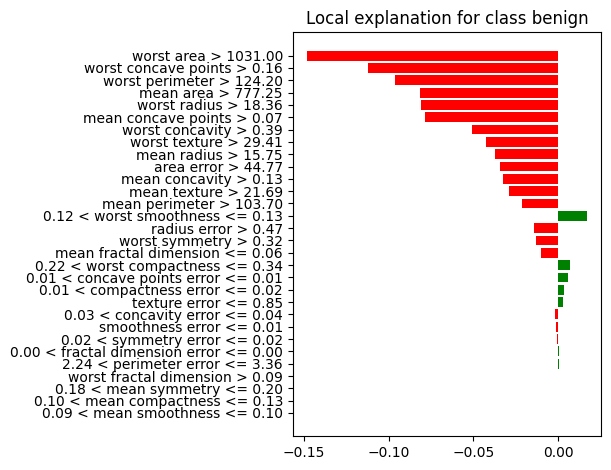

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(9.436), np.str_('mean texture'): np.float64(18.32), np.str_('mean perimeter'): np.float64(59.82), np.str_('mean area'): np.float64(278.6), np.str_('mean smoothness'): np.float64(0.1009), np.str_('mean compactness'): np.float64(0.05956), np.str_('mean concavity'): np.float64(0.0271), np.str_('mean concave points'): np.float64(0.01406), np.str_('mean symmetry'): np.float64(0.1506), np.str_('mean fractal dimension'): np.float64(0.06959), np.str_('radius error'): np.float64(0.5079), np.str_('texture error'): np.float64(1.247), np.str_('perimeter error'): np.float64(3.267), np.str_('area error'): np.float64(30.48), np.str_('smoothness error'): np.float64(0.006836), np.str_('compactness error'): np.float64(0.008982), np.str_('concavity error'): np.float64(0.02348), np.str_('concave points error'): np.float64(0.006565), np.str_('symmetry error'): np.float64(0.01942), np.str_('fractal dimension error'): np.float64(0.0027

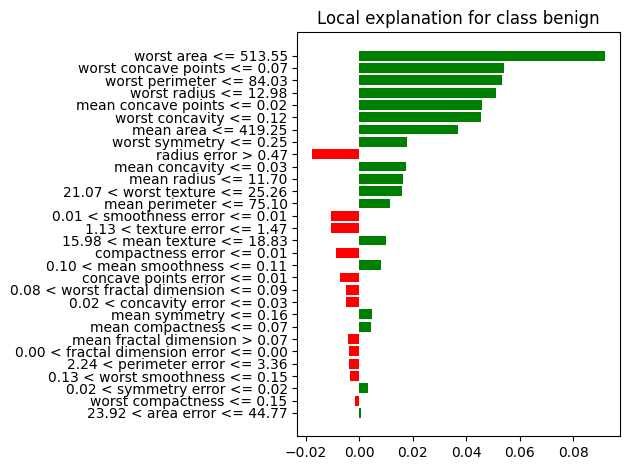

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(14.5), np.str_('mean texture'): np.float64(10.89), np.str_('mean perimeter'): np.float64(94.28), np.str_('mean area'): np.float64(640.7), np.str_('mean smoothness'): np.float64(0.1101), np.str_('mean compactness'): np.float64(0.1099), np.str_('mean concavity'): np.float64(0.08842), np.str_('mean concave points'): np.float64(0.05778), np.str_('mean symmetry'): np.float64(0.1856), np.str_('mean fractal dimension'): np.float64(0.06402), np.str_('radius error'): np.float64(0.2929), np.str_('texture error'): np.float64(0.857), np.str_('perimeter error'): np.float64(1.928), np.str_('area error'): np.float64(24.19), np.str_('smoothness error'): np.float64(0.003818), np.str_('compactness error'): np.float64(0.01276), np.str_('concavity error'): np.float64(0.02882), np.str_('concave points error'): np.float64(0.012), np.str_('symmetry error'): np.float64(0.0191), np.str_('fractal dimension error'): np.float64(0.002808), n

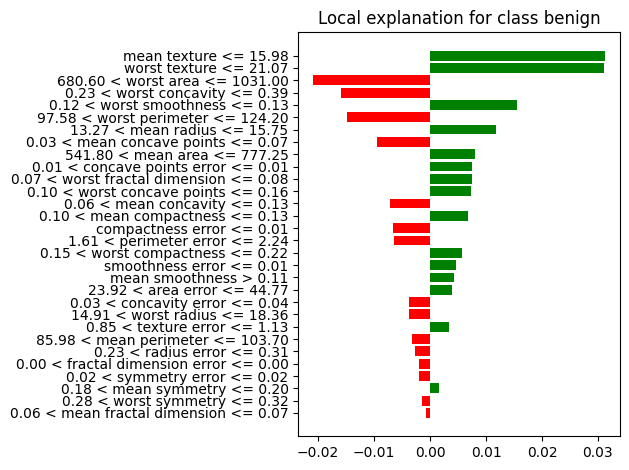

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(12.76), np.str_('mean texture'): np.float64(18.84), np.str_('mean perimeter'): np.float64(81.87), np.str_('mean area'): np.float64(496.6), np.str_('mean smoothness'): np.float64(0.09676), np.str_('mean compactness'): np.float64(0.07952), np.str_('mean concavity'): np.float64(0.02688), np.str_('mean concave points'): np.float64(0.01781), np.str_('mean symmetry'): np.float64(0.1759), np.str_('mean fractal dimension'): np.float64(0.06183), np.str_('radius error'): np.float64(0.2213), np.str_('texture error'): np.float64(1.285), np.str_('perimeter error'): np.float64(1.535), np.str_('area error'): np.float64(17.26), np.str_('smoothness error'): np.float64(0.005608), np.str_('compactness error'): np.float64(0.01646), np.str_('concavity error'): np.float64(0.01529), np.str_('concave points error'): np.float64(0.009997), np.str_('symmetry error'): np.float64(0.01909), np.str_('fractal dimension error'): np.float64(0.002

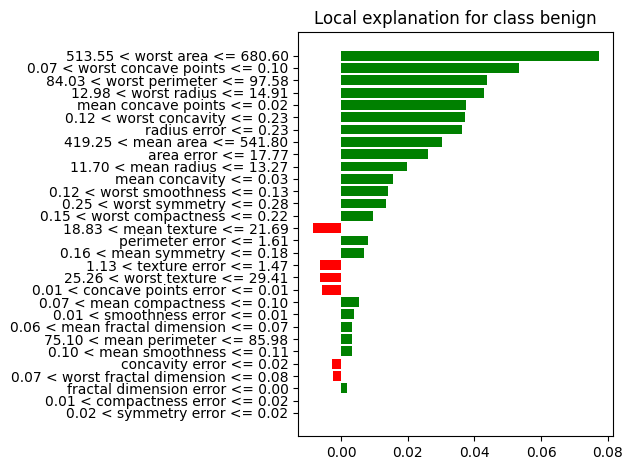

Correct:  Malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(15.08), np.str_('mean texture'): np.float64(25.74), np.str_('mean perimeter'): np.float64(98.0), np.str_('mean area'): np.float64(716.6), np.str_('mean smoothness'): np.float64(0.1024), np.str_('mean compactness'): np.float64(0.09769), np.str_('mean concavity'): np.float64(0.1235), np.str_('mean concave points'): np.float64(0.06553), np.str_('mean symmetry'): np.float64(0.1647), np.str_('mean fractal dimension'): np.float64(0.06464), np.str_('radius error'): np.float64(0.6534), np.str_('texture error'): np.float64(1.506), np.str_('perimeter error'): np.float64(4.174), np.str_('area error'): np.float64(63.37), np.str_('smoothness error'): np.float64(0.01052), np.str_('compactness error'): np.float64(0.02431), np.str_('concavity error'): np.float64(0.04912), np.str_('concave points error'): np.float64(0.01746), np.str_('symmetry error'): np.float64(0.0212), np.str_('fractal dimension error'): np.float64(0.004867

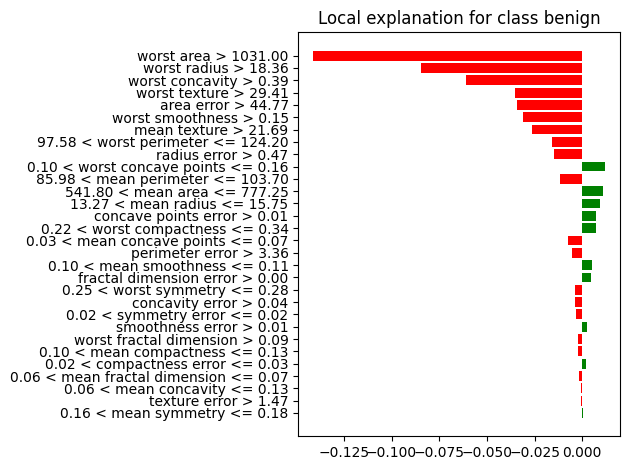

Correct:  Malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(25.22), np.str_('mean texture'): np.float64(24.91), np.str_('mean perimeter'): np.float64(171.5), np.str_('mean area'): np.float64(1878.0), np.str_('mean smoothness'): np.float64(0.1063), np.str_('mean compactness'): np.float64(0.2665), np.str_('mean concavity'): np.float64(0.3339), np.str_('mean concave points'): np.float64(0.1845), np.str_('mean symmetry'): np.float64(0.1829), np.str_('mean fractal dimension'): np.float64(0.06782), np.str_('radius error'): np.float64(0.8973), np.str_('texture error'): np.float64(1.474), np.str_('perimeter error'): np.float64(7.382), np.str_('area error'): np.float64(120.0), np.str_('smoothness error'): np.float64(0.008166), np.str_('compactness error'): np.float64(0.05693), np.str_('concavity error'): np.float64(0.0573), np.str_('concave points error'): np.float64(0.0203), np.str_('symmetry error'): np.float64(0.01065), np.str_('fractal dimension error'): np.float64(0.005893

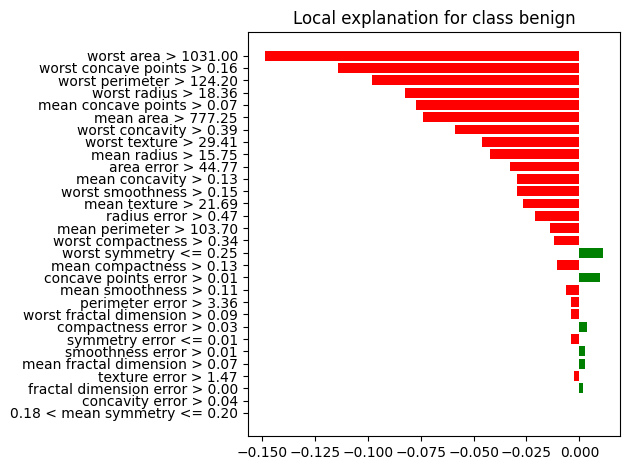

Correct:  Malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(27.22), np.str_('mean texture'): np.float64(21.87), np.str_('mean perimeter'): np.float64(182.1), np.str_('mean area'): np.float64(2250.0), np.str_('mean smoothness'): np.float64(0.1094), np.str_('mean compactness'): np.float64(0.1914), np.str_('mean concavity'): np.float64(0.2871), np.str_('mean concave points'): np.float64(0.1878), np.str_('mean symmetry'): np.float64(0.18), np.str_('mean fractal dimension'): np.float64(0.0577), np.str_('radius error'): np.float64(0.8361), np.str_('texture error'): np.float64(1.481), np.str_('perimeter error'): np.float64(5.82), np.str_('area error'): np.float64(128.7), np.str_('smoothness error'): np.float64(0.004631), np.str_('compactness error'): np.float64(0.02537), np.str_('concavity error'): np.float64(0.03109), np.str_('concave points error'): np.float64(0.01241), np.str_('symmetry error'): np.float64(0.01575), np.str_('fractal dimension error'): np.float64(0.002747),

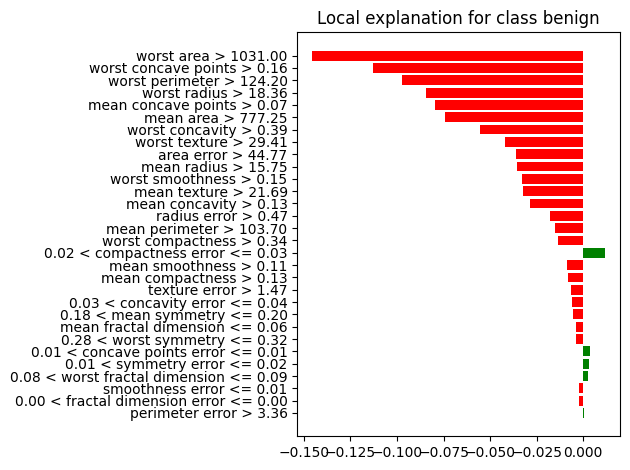

Correct:  Malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(23.21), np.str_('mean texture'): np.float64(26.97), np.str_('mean perimeter'): np.float64(153.5), np.str_('mean area'): np.float64(1670.0), np.str_('mean smoothness'): np.float64(0.09509), np.str_('mean compactness'): np.float64(0.1682), np.str_('mean concavity'): np.float64(0.195), np.str_('mean concave points'): np.float64(0.1237), np.str_('mean symmetry'): np.float64(0.1909), np.str_('mean fractal dimension'): np.float64(0.06309), np.str_('radius error'): np.float64(1.058), np.str_('texture error'): np.float64(0.9635), np.str_('perimeter error'): np.float64(7.247), np.str_('area error'): np.float64(155.8), np.str_('smoothness error'): np.float64(0.006428), np.str_('compactness error'): np.float64(0.02863), np.str_('concavity error'): np.float64(0.04497), np.str_('concave points error'): np.float64(0.01716), np.str_('symmetry error'): np.float64(0.0159), np.str_('fractal dimension error'): np.float64(0.00305

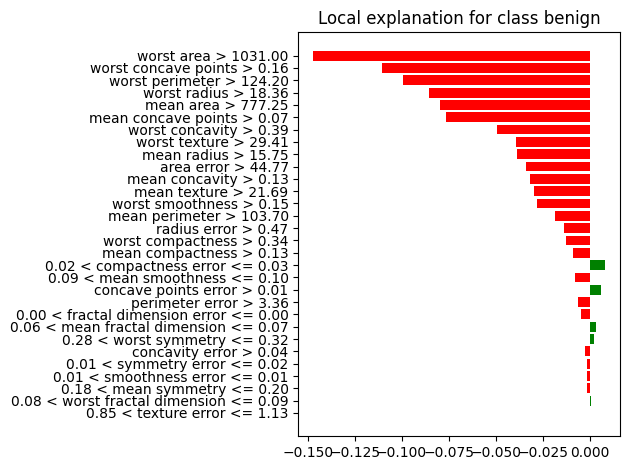

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(10.26), np.str_('mean texture'): np.float64(12.22), np.str_('mean perimeter'): np.float64(65.75), np.str_('mean area'): np.float64(321.6), np.str_('mean smoothness'): np.float64(0.09996), np.str_('mean compactness'): np.float64(0.07542), np.str_('mean concavity'): np.float64(0.01923), np.str_('mean concave points'): np.float64(0.01968), np.str_('mean symmetry'): np.float64(0.18), np.str_('mean fractal dimension'): np.float64(0.06569), np.str_('radius error'): np.float64(0.1911), np.str_('texture error'): np.float64(0.5477), np.str_('perimeter error'): np.float64(1.348), np.str_('area error'): np.float64(11.88), np.str_('smoothness error'): np.float64(0.005682), np.str_('compactness error'): np.float64(0.01365), np.str_('concavity error'): np.float64(0.008496), np.str_('concave points error'): np.float64(0.006929), np.str_('symmetry error'): np.float64(0.01938), np.str_('fractal dimension error'): np.float64(0.002

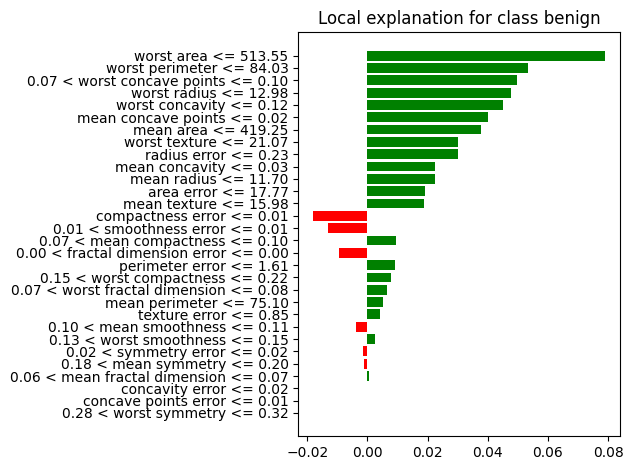

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(13.87), np.str_('mean texture'): np.float64(16.21), np.str_('mean perimeter'): np.float64(88.52), np.str_('mean area'): np.float64(593.7), np.str_('mean smoothness'): np.float64(0.08743), np.str_('mean compactness'): np.float64(0.05492), np.str_('mean concavity'): np.float64(0.01502), np.str_('mean concave points'): np.float64(0.02088), np.str_('mean symmetry'): np.float64(0.1424), np.str_('mean fractal dimension'): np.float64(0.05883), np.str_('radius error'): np.float64(0.2543), np.str_('texture error'): np.float64(1.363), np.str_('perimeter error'): np.float64(1.737), np.str_('area error'): np.float64(20.74), np.str_('smoothness error'): np.float64(0.005638), np.str_('compactness error'): np.float64(0.007939), np.str_('concavity error'): np.float64(0.005254), np.str_('concave points error'): np.float64(0.006042), np.str_('symmetry error'): np.float64(0.01544), np.str_('fractal dimension error'): np.float64(0.0

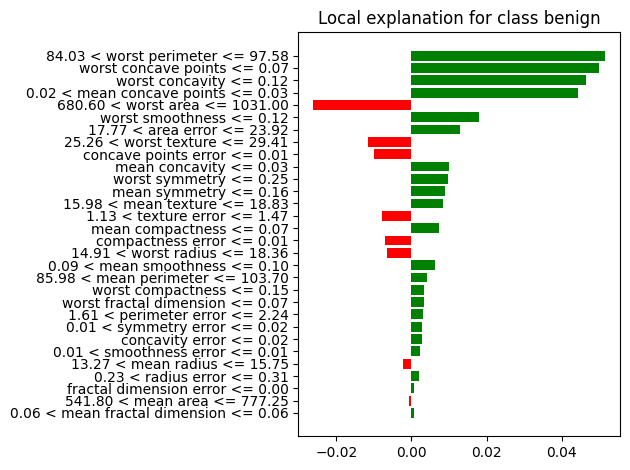

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(12.88), np.str_('mean texture'): np.float64(18.22), np.str_('mean perimeter'): np.float64(84.45), np.str_('mean area'): np.float64(493.1), np.str_('mean smoothness'): np.float64(0.1218), np.str_('mean compactness'): np.float64(0.1661), np.str_('mean concavity'): np.float64(0.04825), np.str_('mean concave points'): np.float64(0.05303), np.str_('mean symmetry'): np.float64(0.1709), np.str_('mean fractal dimension'): np.float64(0.07253), np.str_('radius error'): np.float64(0.4426), np.str_('texture error'): np.float64(1.169), np.str_('perimeter error'): np.float64(3.176), np.str_('area error'): np.float64(34.37), np.str_('smoothness error'): np.float64(0.005273), np.str_('compactness error'): np.float64(0.02329), np.str_('concavity error'): np.float64(0.01405), np.str_('concave points error'): np.float64(0.01244), np.str_('symmetry error'): np.float64(0.01816), np.str_('fractal dimension error'): np.float64(0.003299

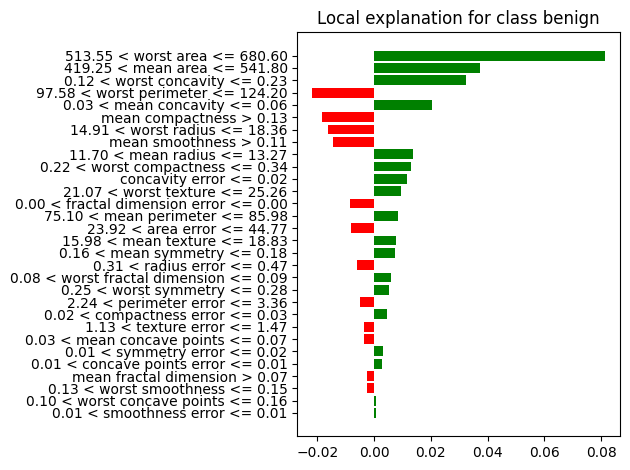

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(10.08), np.str_('mean texture'): np.float64(15.11), np.str_('mean perimeter'): np.float64(63.76), np.str_('mean area'): np.float64(317.5), np.str_('mean smoothness'): np.float64(0.09267), np.str_('mean compactness'): np.float64(0.04695), np.str_('mean concavity'): np.float64(0.001597), np.str_('mean concave points'): np.float64(0.002404), np.str_('mean symmetry'): np.float64(0.1703), np.str_('mean fractal dimension'): np.float64(0.06048), np.str_('radius error'): np.float64(0.4245), np.str_('texture error'): np.float64(1.268), np.str_('perimeter error'): np.float64(2.68), np.str_('area error'): np.float64(26.43), np.str_('smoothness error'): np.float64(0.01439), np.str_('compactness error'): np.float64(0.012), np.str_('concavity error'): np.float64(0.001597), np.str_('concave points error'): np.float64(0.002404), np.str_('symmetry error'): np.float64(0.02538), np.str_('fractal dimension error'): np.float64(0.0034

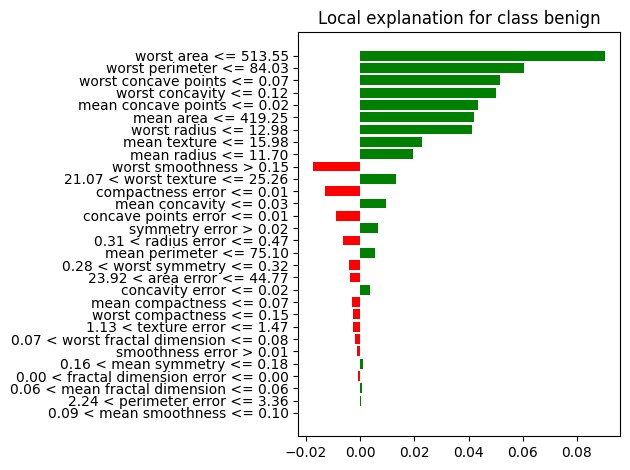

Correct:  Malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(15.7), np.str_('mean texture'): np.float64(20.31), np.str_('mean perimeter'): np.float64(101.2), np.str_('mean area'): np.float64(766.6), np.str_('mean smoothness'): np.float64(0.09597), np.str_('mean compactness'): np.float64(0.08799), np.str_('mean concavity'): np.float64(0.06593), np.str_('mean concave points'): np.float64(0.05189), np.str_('mean symmetry'): np.float64(0.1618), np.str_('mean fractal dimension'): np.float64(0.05549), np.str_('radius error'): np.float64(0.3699), np.str_('texture error'): np.float64(1.15), np.str_('perimeter error'): np.float64(2.406), np.str_('area error'): np.float64(40.98), np.str_('smoothness error'): np.float64(0.004626), np.str_('compactness error'): np.float64(0.02263), np.str_('concavity error'): np.float64(0.01954), np.str_('concave points error'): np.float64(0.009767), np.str_('symmetry error'): np.float64(0.01547), np.str_('fractal dimension error'): np.float64(0.00

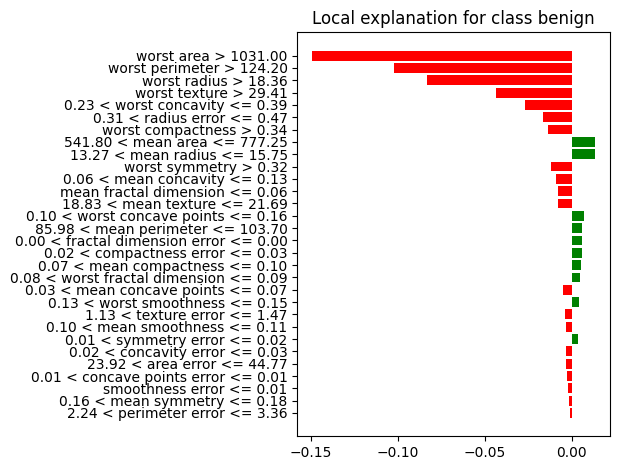

Correct:  Malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(17.91), np.str_('mean texture'): np.float64(21.02), np.str_('mean perimeter'): np.float64(124.4), np.str_('mean area'): np.float64(994.0), np.str_('mean smoothness'): np.float64(0.123), np.str_('mean compactness'): np.float64(0.2576), np.str_('mean concavity'): np.float64(0.3189), np.str_('mean concave points'): np.float64(0.1198), np.str_('mean symmetry'): np.float64(0.2113), np.str_('mean fractal dimension'): np.float64(0.07115), np.str_('radius error'): np.float64(0.403), np.str_('texture error'): np.float64(0.7747), np.str_('perimeter error'): np.float64(3.123), np.str_('area error'): np.float64(41.51), np.str_('smoothness error'): np.float64(0.007159), np.str_('compactness error'): np.float64(0.03718), np.str_('concavity error'): np.float64(0.06165), np.str_('concave points error'): np.float64(0.01051), np.str_('symmetry error'): np.float64(0.01591), np.str_('fractal dimension error'): np.float64(0.005099

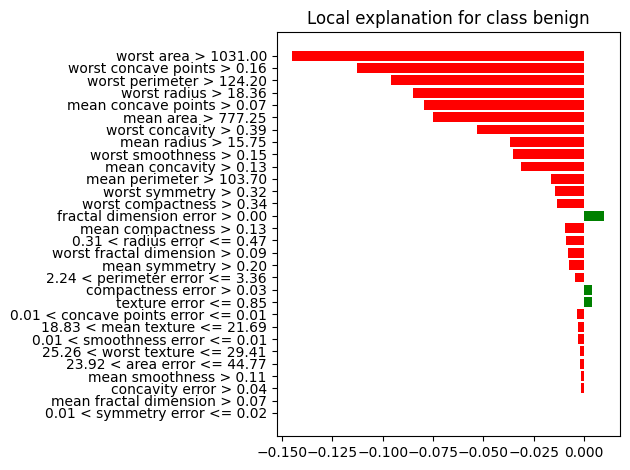

Correct:  Malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(21.09), np.str_('mean texture'): np.float64(26.57), np.str_('mean perimeter'): np.float64(142.7), np.str_('mean area'): np.float64(1311.0), np.str_('mean smoothness'): np.float64(0.1141), np.str_('mean compactness'): np.float64(0.2832), np.str_('mean concavity'): np.float64(0.2487), np.str_('mean concave points'): np.float64(0.1496), np.str_('mean symmetry'): np.float64(0.2395), np.str_('mean fractal dimension'): np.float64(0.07398), np.str_('radius error'): np.float64(0.6298), np.str_('texture error'): np.float64(0.7629), np.str_('perimeter error'): np.float64(4.414), np.str_('area error'): np.float64(81.46), np.str_('smoothness error'): np.float64(0.004253), np.str_('compactness error'): np.float64(0.04759), np.str_('concavity error'): np.float64(0.03872), np.str_('concave points error'): np.float64(0.01567), np.str_('symmetry error'): np.float64(0.01798), np.str_('fractal dimension error'): np.float64(0.005

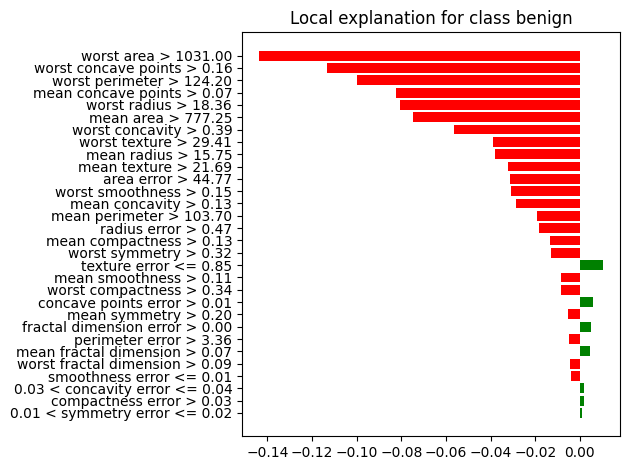

Correct:  Malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(20.44), np.str_('mean texture'): np.float64(21.78), np.str_('mean perimeter'): np.float64(133.8), np.str_('mean area'): np.float64(1293.0), np.str_('mean smoothness'): np.float64(0.0915), np.str_('mean compactness'): np.float64(0.1131), np.str_('mean concavity'): np.float64(0.09799), np.str_('mean concave points'): np.float64(0.07785), np.str_('mean symmetry'): np.float64(0.1618), np.str_('mean fractal dimension'): np.float64(0.05557), np.str_('radius error'): np.float64(0.5781), np.str_('texture error'): np.float64(0.9168), np.str_('perimeter error'): np.float64(4.218), np.str_('area error'): np.float64(72.44), np.str_('smoothness error'): np.float64(0.006208), np.str_('compactness error'): np.float64(0.01906), np.str_('concavity error'): np.float64(0.02375), np.str_('concave points error'): np.float64(0.01461), np.str_('symmetry error'): np.float64(0.01445), np.str_('fractal dimension error'): np.float64(0.0

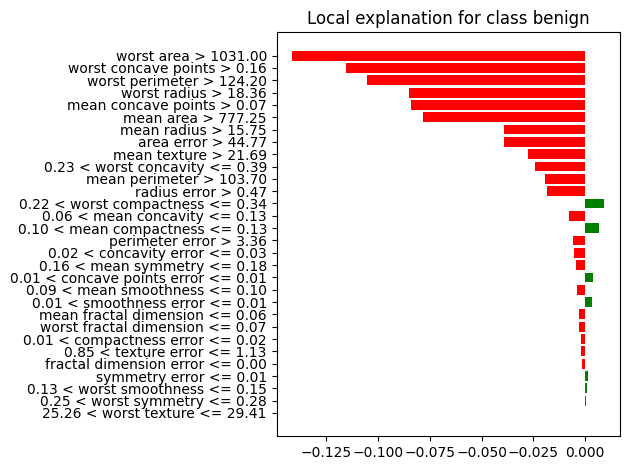

Correct:  Malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(22.01), np.str_('mean texture'): np.float64(21.9), np.str_('mean perimeter'): np.float64(147.2), np.str_('mean area'): np.float64(1482.0), np.str_('mean smoothness'): np.float64(0.1063), np.str_('mean compactness'): np.float64(0.1954), np.str_('mean concavity'): np.float64(0.2448), np.str_('mean concave points'): np.float64(0.1501), np.str_('mean symmetry'): np.float64(0.1824), np.str_('mean fractal dimension'): np.float64(0.0614), np.str_('radius error'): np.float64(1.008), np.str_('texture error'): np.float64(0.6999), np.str_('perimeter error'): np.float64(7.561), np.str_('area error'): np.float64(130.2), np.str_('smoothness error'): np.float64(0.003978), np.str_('compactness error'): np.float64(0.02821), np.str_('concavity error'): np.float64(0.03576), np.str_('concave points error'): np.float64(0.01471), np.str_('symmetry error'): np.float64(0.01518), np.str_('fractal dimension error'): np.float64(0.003796

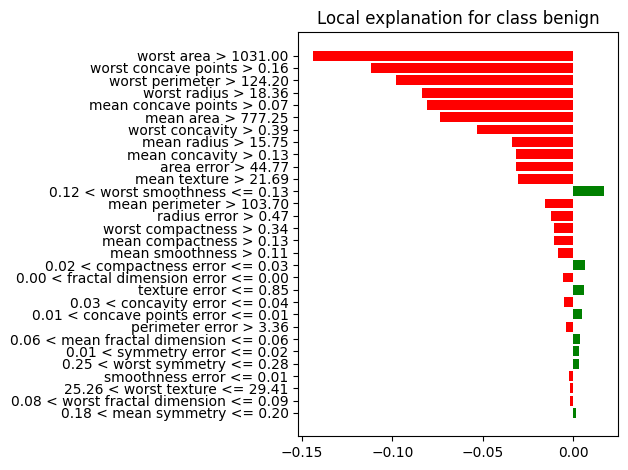

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(15.19), np.str_('mean texture'): np.float64(13.21), np.str_('mean perimeter'): np.float64(97.65), np.str_('mean area'): np.float64(711.8), np.str_('mean smoothness'): np.float64(0.07963), np.str_('mean compactness'): np.float64(0.06934), np.str_('mean concavity'): np.float64(0.03393), np.str_('mean concave points'): np.float64(0.02657), np.str_('mean symmetry'): np.float64(0.1721), np.str_('mean fractal dimension'): np.float64(0.05544), np.str_('radius error'): np.float64(0.1783), np.str_('texture error'): np.float64(0.4125), np.str_('perimeter error'): np.float64(1.338), np.str_('area error'): np.float64(17.72), np.str_('smoothness error'): np.float64(0.005012), np.str_('compactness error'): np.float64(0.01485), np.str_('concavity error'): np.float64(0.01551), np.str_('concave points error'): np.float64(0.009155), np.str_('symmetry error'): np.float64(0.01647), np.str_('fractal dimension error'): np.float64(0.00

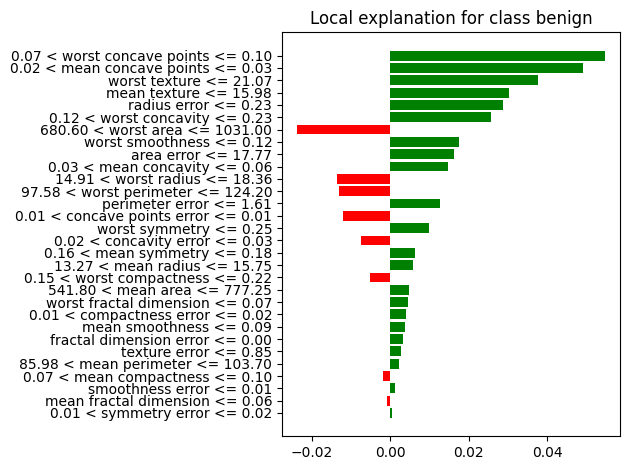

In [9]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data= X_train,
    feature_names=data['feature_names'],
    class_names=data['target_names'],
    mode='classification'
)

for i in range(20):
    print('Correct: ', 'Benign' if y_test[i] else 'Malignant')
    print ('Classification: ', forest_clf.predict([X_test[i]]))
    print(dict(zip(data['feature_names'], X_test[i])))
    
    explanation = explainer.explain_instance(
        data_row=X_test[i],
        predict_fn=forest_clf.predict_proba,
        num_features=30
    )

    fig = explanation.as_pyplot_figure()
    plt.tight_layout()
    plt.show()